In [1]:
import requests
import bs4
import json
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def parse_histogram(h):
    months = {
        'января': 1,
        'февраля': 2,
        'марта': 3,
        'апреля': 4,
        'мая': 5,
        'июня': 6,
        'июля': 7,
        'августа': 8,
        'сентября': 9,
        'октября': 10,
        'ноября': 11,
        'декабря': 12
    }
    assert 'name' in h[0]
    day, month = h[0]['name'].split()
    d = date(2020, months[month], int(day))
    data = {}
    for item in h:
        data[d] = item['value']
        d += timedelta(days=1)
    return data

In [3]:
def make_full(data):
    full_data = []
    min_date = min(min(v.keys()) for v in data.values())
    max_date = max(max(v.keys()) for v in data.values())
    d = min_date
    while d <= max_date:
        row = {'date': d}
        for k in data:
            row[k] = data[k].get(d, np.nan)
        full_data.append(row)
        d += timedelta(days=1)
    return full_data

In [4]:
r = requests.get('https://yandex.ru/web-maps/covid19')
soup = bs4.BeautifulSoup(r.text, features='lxml')
script = soup.find_all('script', class_='config-view')[0]
j = json.loads(script.text)
data = {}
for item in j['covidData']['items']:
    if item.get('ru') and 'histogram' in item:
        data[item['name']] = parse_histogram(item['histogram'])
data = make_full(data)
df = pd.DataFrame(data)

In [5]:
df.set_index('date', inplace=True)

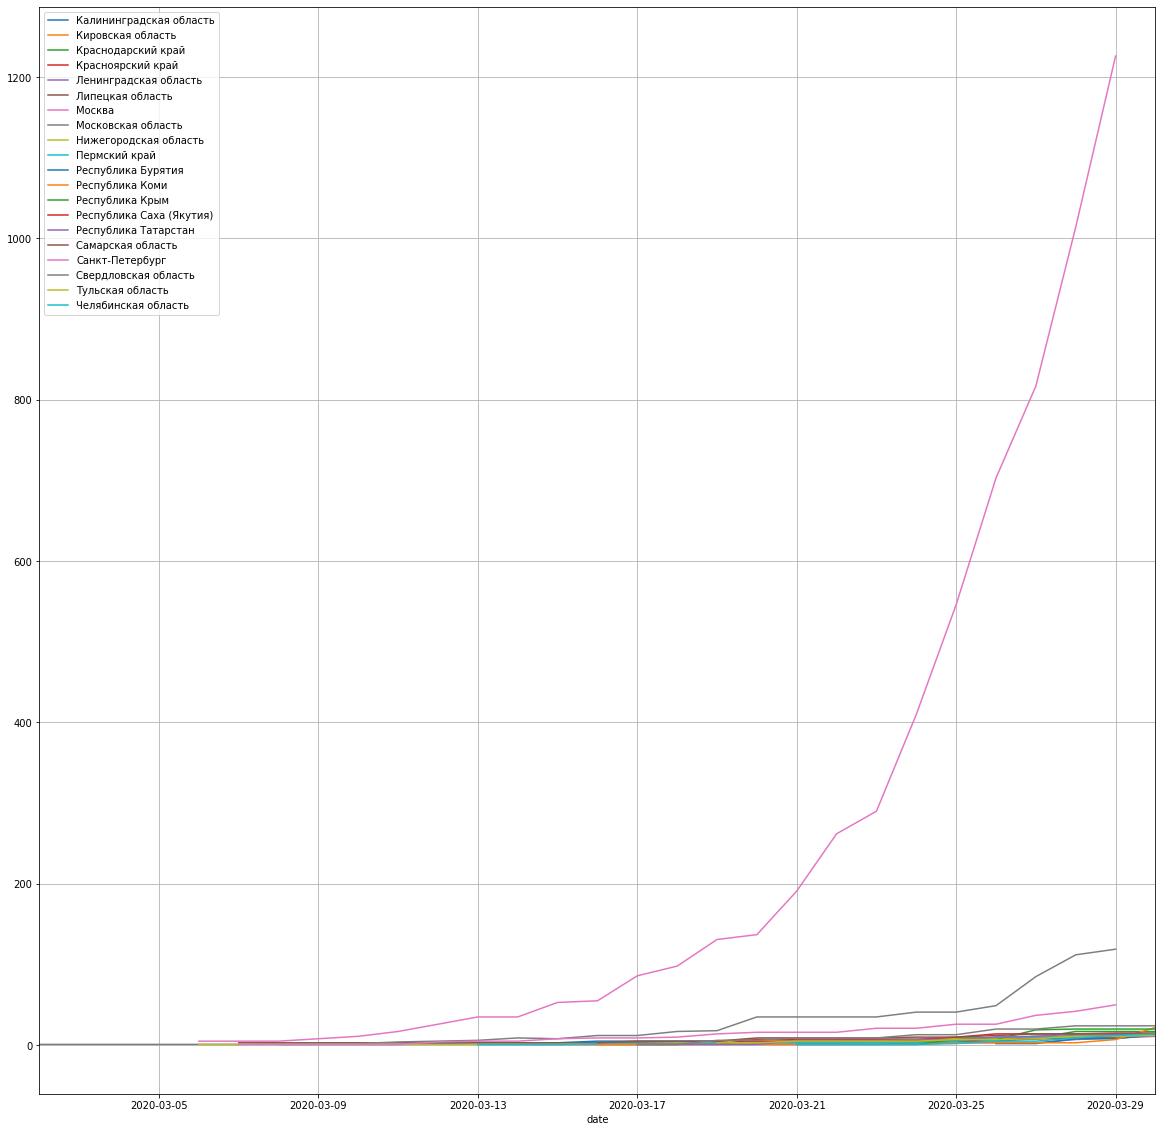

In [6]:
df.plot(figsize=(20, 20), grid=True);

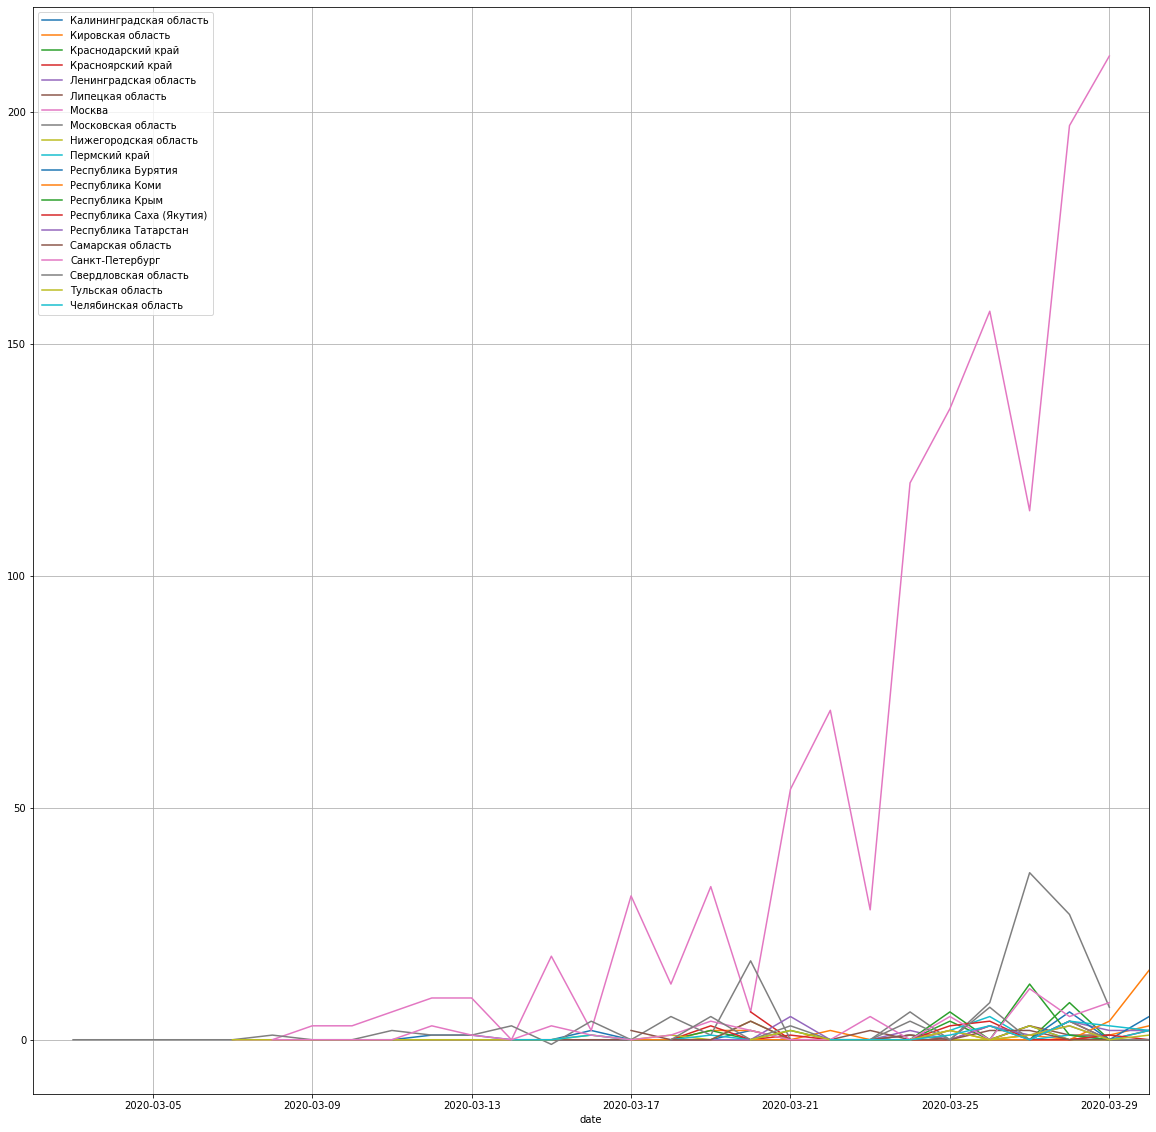

In [11]:
df.diff().plot(figsize=(20, 20), grid=True)

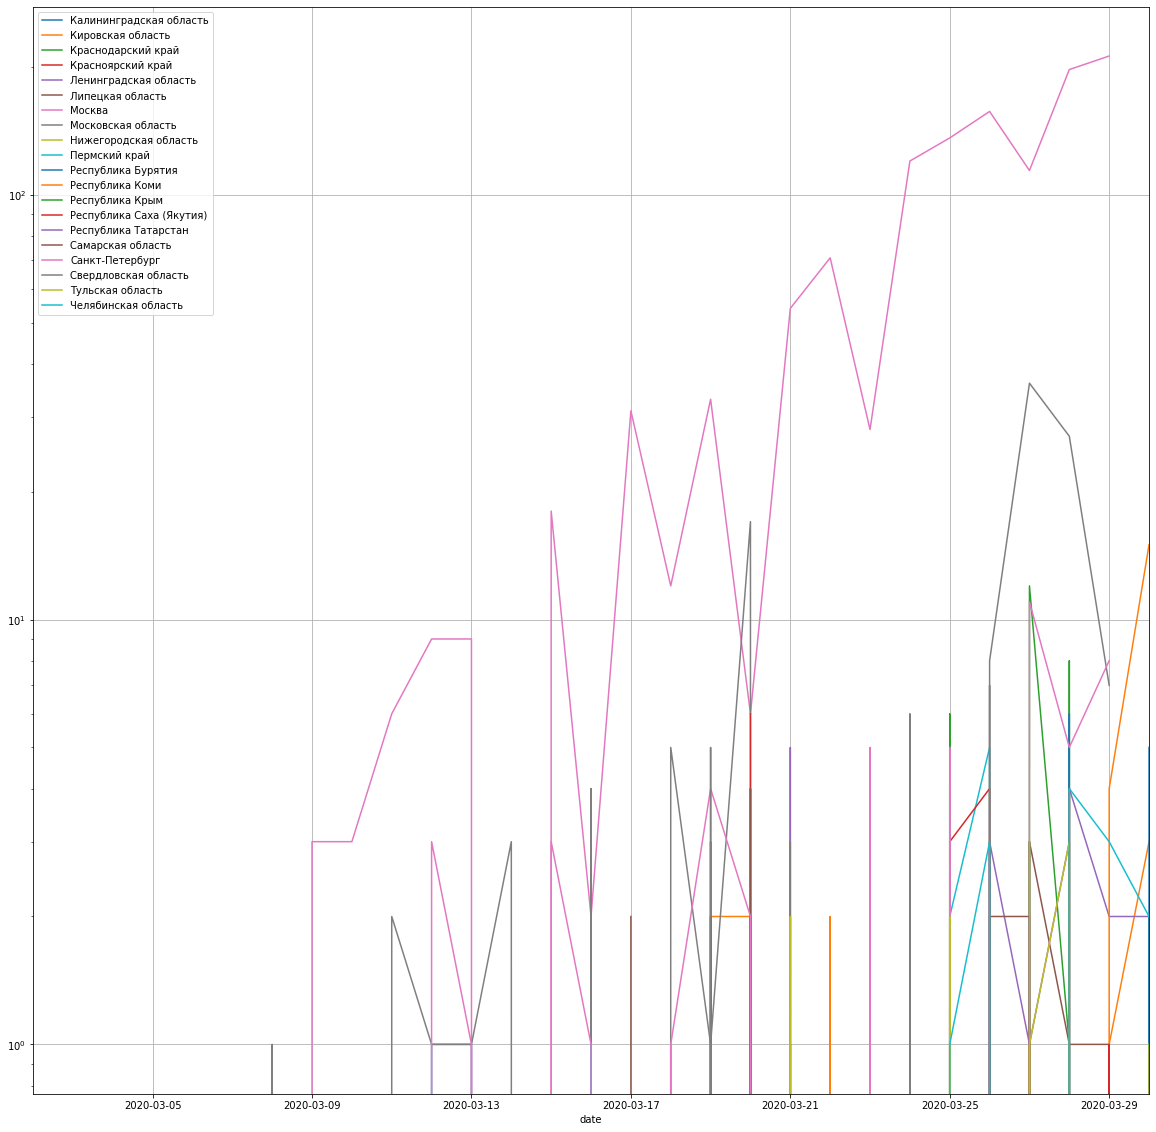

In [12]:
df.diff().plot(figsize=(20, 20), grid=True, logy=True)

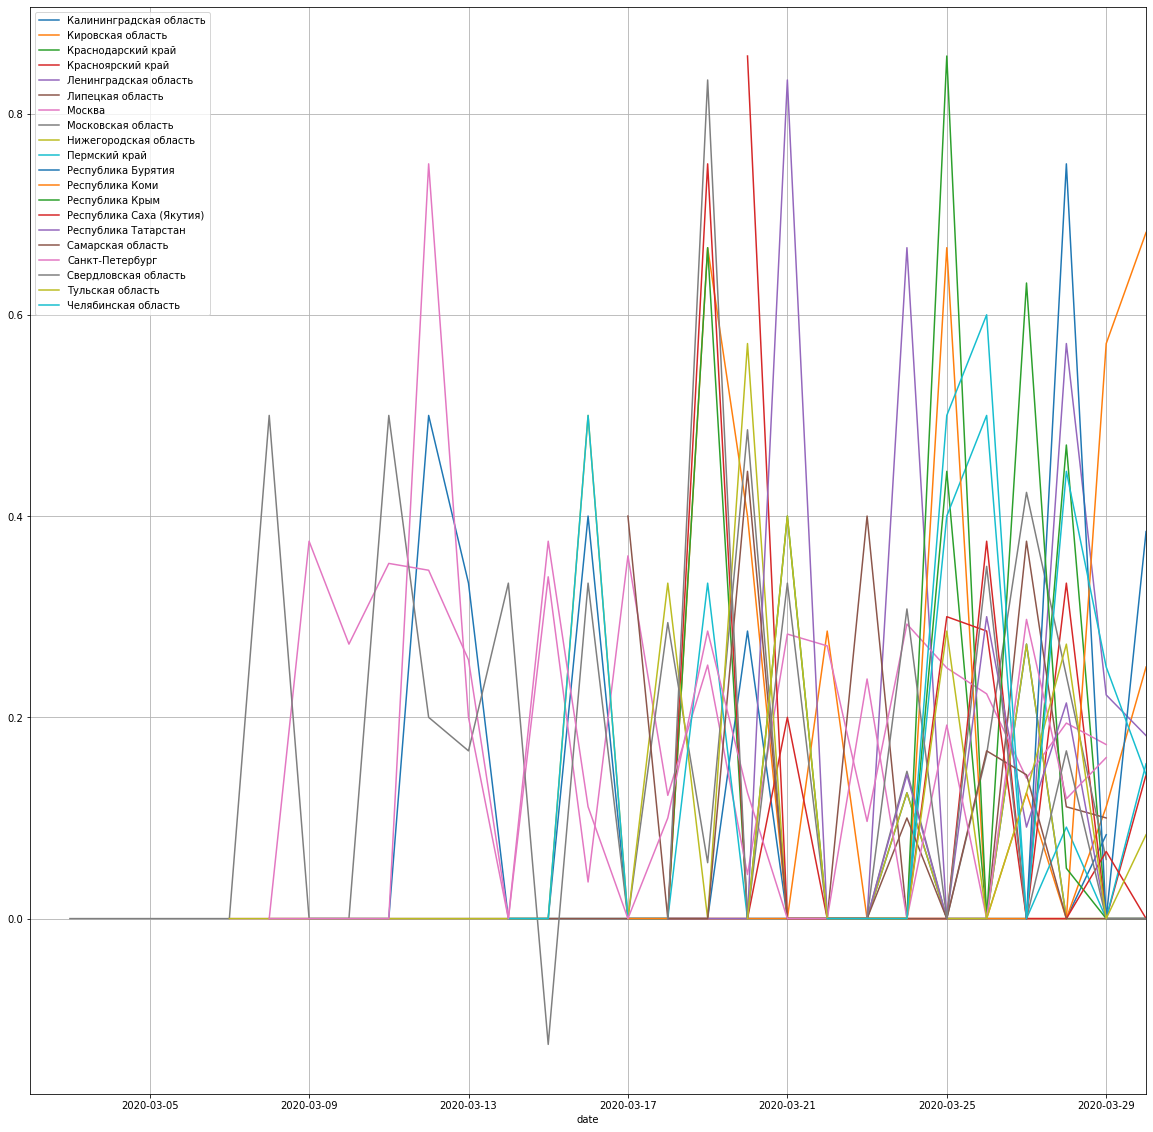

In [9]:
(df.diff() / df).plot(figsize=(20, 20), grid=True)